In [7]:
import healpy as h
import sys  ; sys.path.append("../../codes/")
#from modules import calc_spinylm as sylm
#from modules import local_eb_kernel as rko
from modules_v2 import euler as euler
from modules_v2 import rs_rad_ker as rk
from modules_v2 import return_kernels as return_kernels

%pylab notebook

figpath="../../articles/formalism/figures/new_kernel/"
!mkdir $figpath

Populating the interactive namespace from numpy and matplotlib


/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['rc']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
from matplotlib import rcParams,rc
params = {'backend': 'pdf',
          'savefig.dpi': 200,
          'axes.labelsize': 15,
          'text.fontsize': 15,
          'axes.linewidth' : 2,
          'lines.linewidth' : 2,
          'font.size': 15,
          'xtick.labelsize': 15,
          'ytick.major.pad': 6,
          'xtick.major.pad': 6,
          'ytick.labelsize': 15,
          'text.usetex': True,
          'font.family':'sans-serif',
          'font.sans-serif':'FreeSans'}
rc('text.latex', preamble='\usepackage{sfmath}')
rcParams.update(params)

/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
nside=64 ; npix=h.nside2npix(nside) ; omega=(4.*pi/h.nside2npix(nside))
sampling=6000 ; lmax=3*nside ; odisc=min(180.,180.*(24./lmax))
beta0=min(180,180.*32/(3*nside))*pi/180. ; print beta0*180/pi

theta,pl2=rk.get_plm0(lmax,sampling,theta_max=min(pi,3.*beta0))
rad_ker=rk.calc_qu2eb_rad_ker(lmax,theta,pl2)
rad_ker_i,rad_ker_d=rk.calc_qu2queb_rad_ker(lmax,theta,pl2)

nsideout=2048

30.0


In [53]:
xsize=400  ; reso=(0.7*odisc*60.)/xsize ; grat=2. ; print reso

2.3625


# The kernels are evaluated in the cells below

In [54]:
#lon=90. ; lat=0. # Given in Degrees.
#lon=45. ; lat=87. # Given in Degrees.
#lon=30. ; lat=80. # Given in Degrees.
lon=45. ; lat=90. # Given in Degrees.

cpix,radiate_qu2eb=return_kernels.return_qu2eb_kernel_radiate(nsideout,lon,lat,beta0,theta,rad_ker)
cpix,radiate_eb2qu=return_kernels.return_eb2qu_kernel_radiate(nsideout,lon,lat,beta0,theta,rad_ker)
cpix,Dker=return_kernels.return_D_kernel_radcon(nsideout,lon,lat,beta0,theta,rad_ker_d)
cpix,Iker=return_kernels.return_I_kernel_radiate(nsideout,lon,lat,beta0,theta,rad_ker_i)

# Radiating QU to EB kernel

<IPython.core.display.Javascript object>


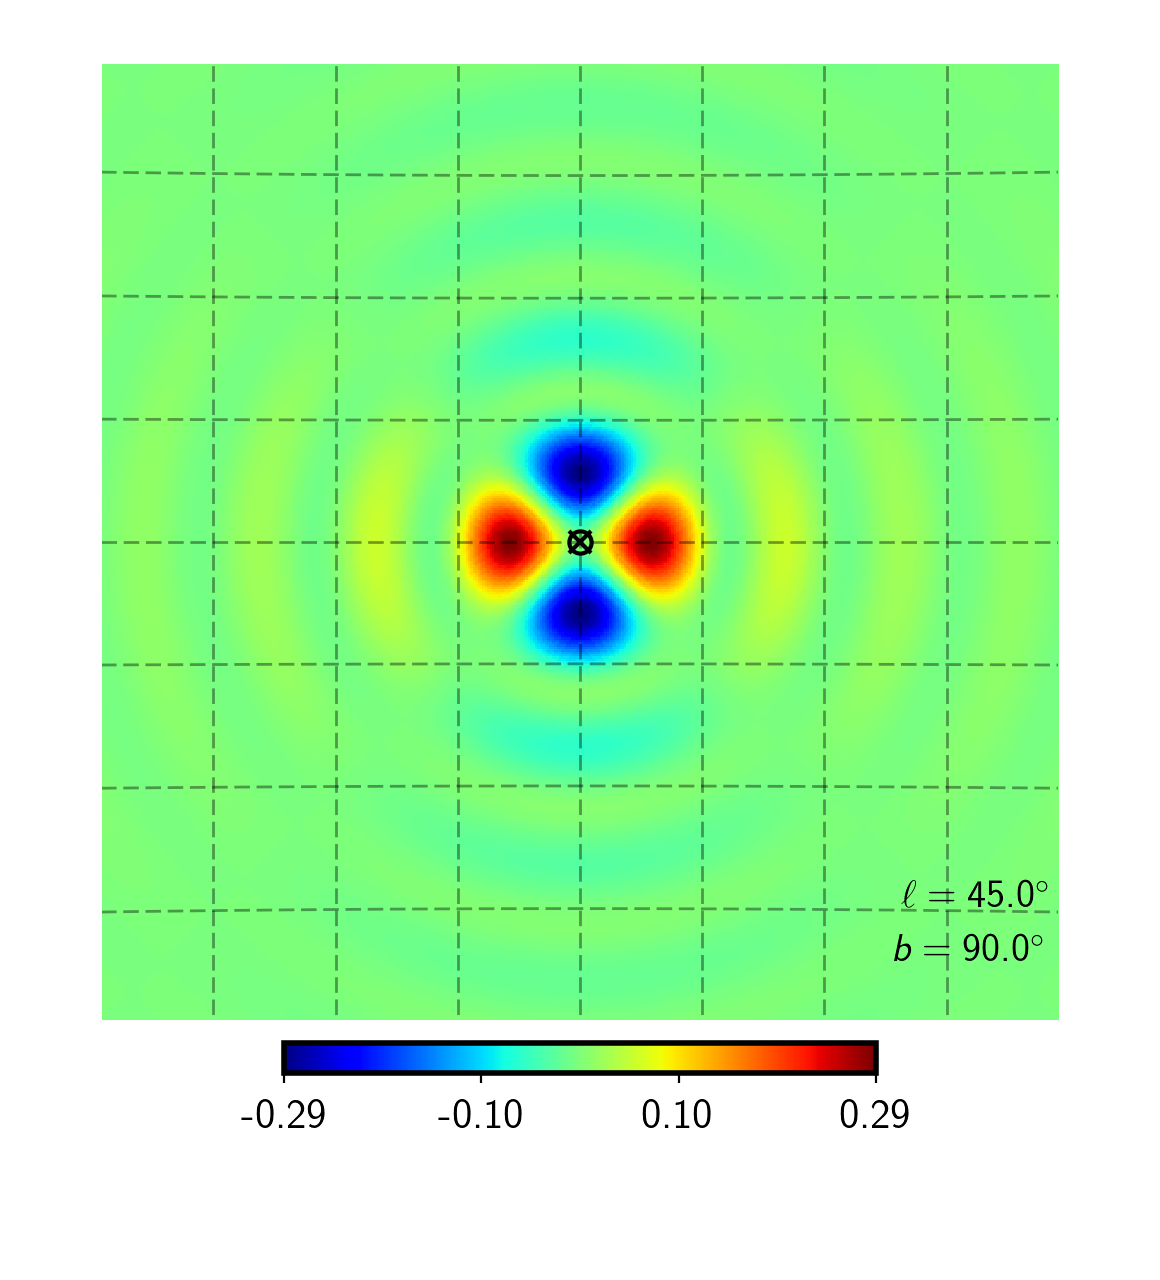

79.0270619358 100.972938064 -10.9729380642 10.9729380642
The interval between parallels is 2 deg 0.00'.
The interval between meridians is 2 deg 0.00'.


<IPython.core.display.Javascript object>


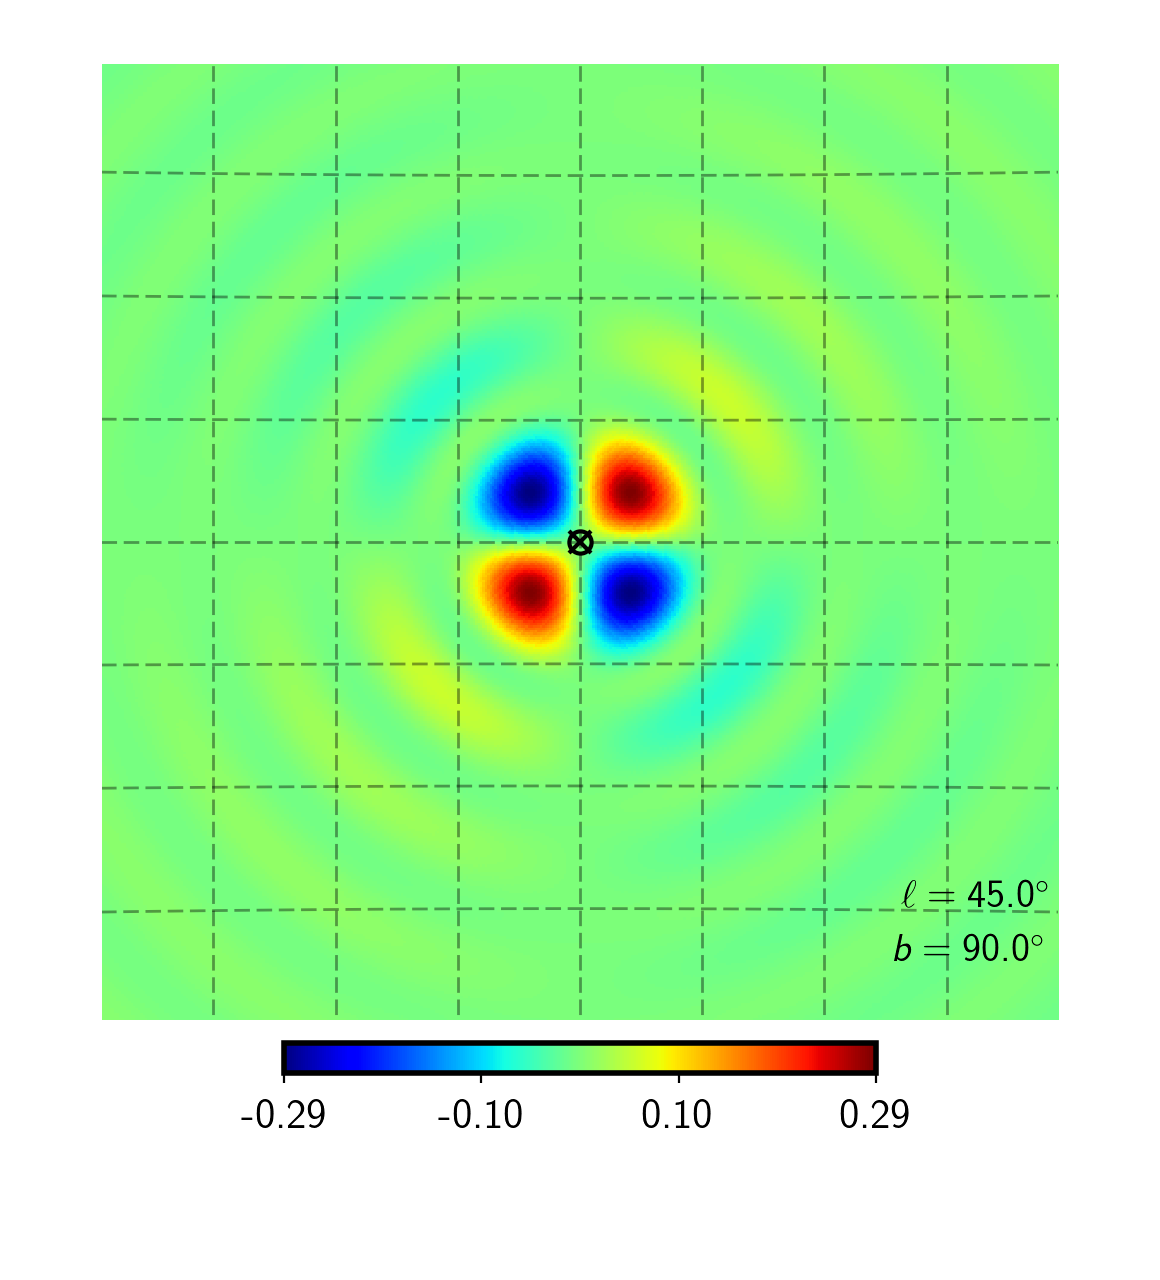

79.0270619358 100.972938064 -10.9729380642 10.9729380642
The interval between parallels is 2 deg 0.00'.
The interval between meridians is 2 deg 0.00'.


In [55]:
tmap=radiate_qu2eb[0]*omega ; vmin=min(tmap) ; vmax=max(tmap)
h.gnomview(tmap,rot=(lon,lat),xsize=xsize,ysize=xsize,reso=reso,title="",min=vmin,max=vmax,notext=True,cbar=None)
h.graticule(dpar=grat,dmer=grat,linestyle="dashed",alpha=0.4)
fig = gcf() ; ax = gca() ; image = ax.get_images()[0]
cmap = fig.colorbar(image,orientation="horizontal",shrink=0.6,pad=0.02,ticks=linspace(vmin,vmax,4),format="%.2f")
cmap.solids.set_edgecolor("face")
text(0.09,-0.120,r"$b=" + str(round(lat,1)) + "^\circ$",fontsize=14)
text(0.092,-0.105,r"$\ell=" + str(round(lon,1)) + "^\circ$",fontsize=14)
h.projplot(0.*np.pi/180,0.*np.pi/180,"x",color="white",markersize=8,markeredgecolor="black",fillstyle="none",markeredgewidth=1.5)
h.projplot((90-lat)*np.pi/180,lon*np.pi/180,"o",color="white",markersize=8,markeredgecolor="black",fillstyle="none",markeredgewidth=1.5)
savefig(figpath + "qu2eb_rker_rad_lat" + str(int(round(lat))) + "_lon" + str(int(round(lon))) + ".pdf",dpi=300,bbox_inches="tight")

tmap=radiate_qu2eb[1]*omega ; vmin=min(tmap) ; vmax=max(tmap)
h.gnomview(tmap,rot=(lon,lat),xsize=xsize,ysize=xsize,reso=reso,title="",min=vmin,max=vmax,notext=True,cbar=None)
h.graticule(dpar=grat,dmer=grat,linestyle="dashed",alpha=0.4)
fig = gcf() ; ax = gca() ; image = ax.get_images()[0]
cmap = fig.colorbar(image,orientation="horizontal",shrink=0.6,pad=0.02,ticks=linspace(vmin,vmax,4),format="%.2f")
cmap.solids.set_edgecolor("face")
text(0.09,-0.120,r"$b=" + str(round(lat,1)) + "^\circ$",fontsize=14)
text(0.092,-0.105,r"$\ell=" + str(round(lon,1)) + "^\circ$",fontsize=14)
h.projplot(0.*np.pi/180,0.*np.pi/180,"x",color="white",markersize=8,markeredgecolor="black",fillstyle="none",markeredgewidth=1.5)
h.projplot((90-lat)*np.pi/180,lon*np.pi/180,"o",color="white",markersize=8,markeredgecolor="black",fillstyle="none",markeredgewidth=1.5)
savefig(figpath + "qu2eb_iker_rad_lat" + str(int(round(lat))) + "_lon" + str(int(round(lon))) + ".pdf",dpi=300,bbox_inches="tight")

# Radiate EB to QU kernel

<IPython.core.display.Javascript object>


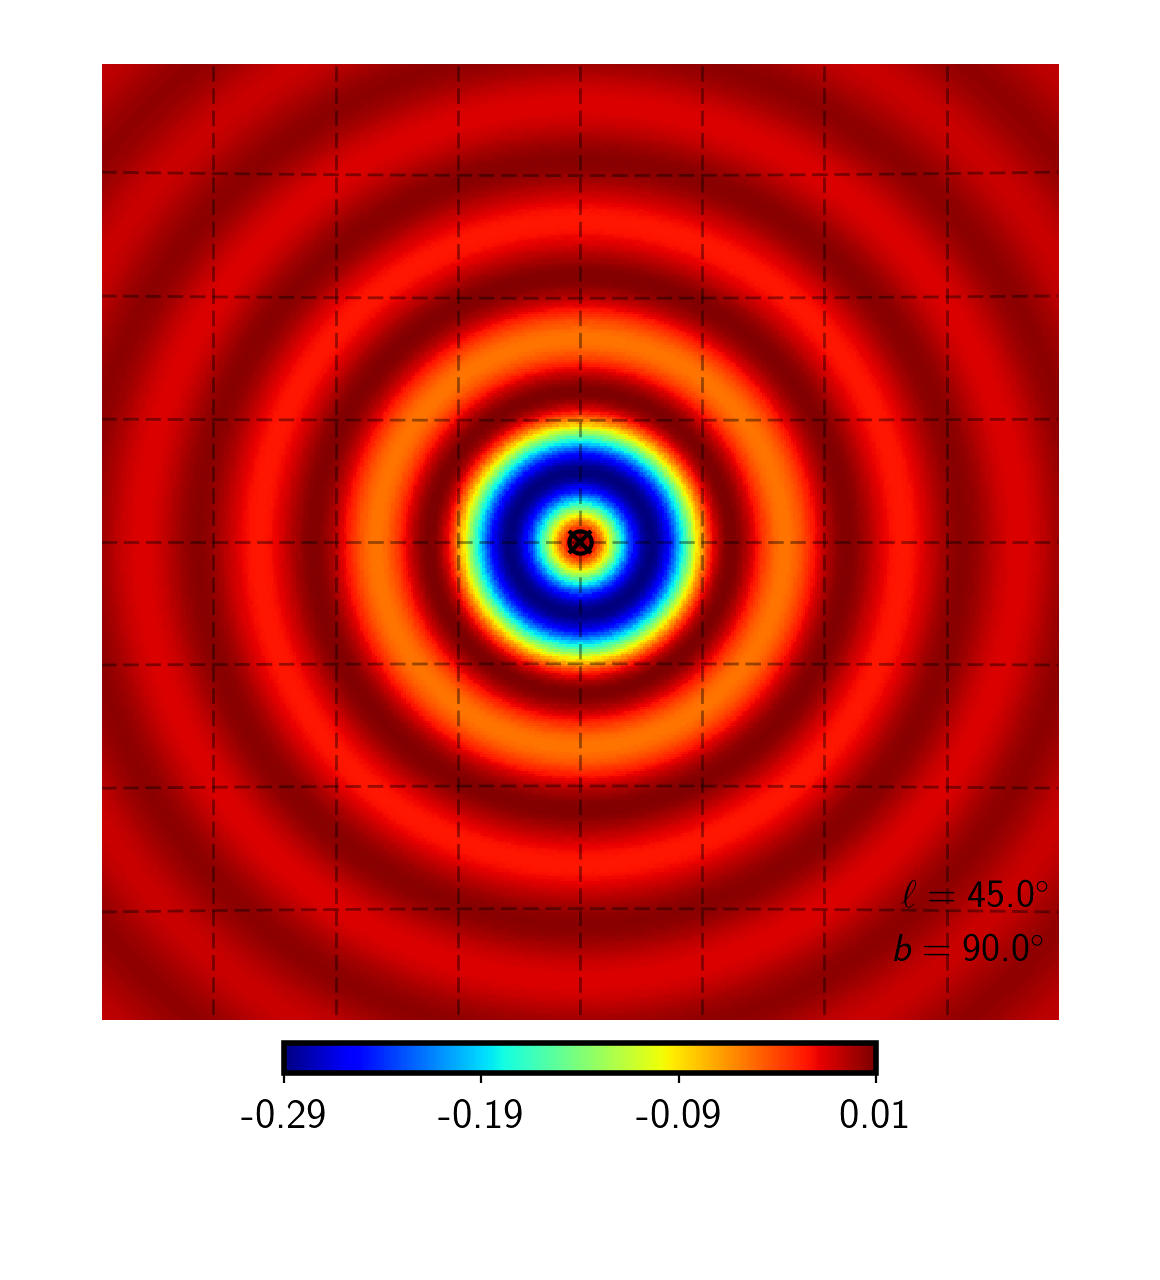

79.0270619358 100.972938064 -10.9729380642 10.9729380642
The interval between parallels is 2 deg 0.00'.
The interval between meridians is 2 deg 0.00'.


<IPython.core.display.Javascript object>


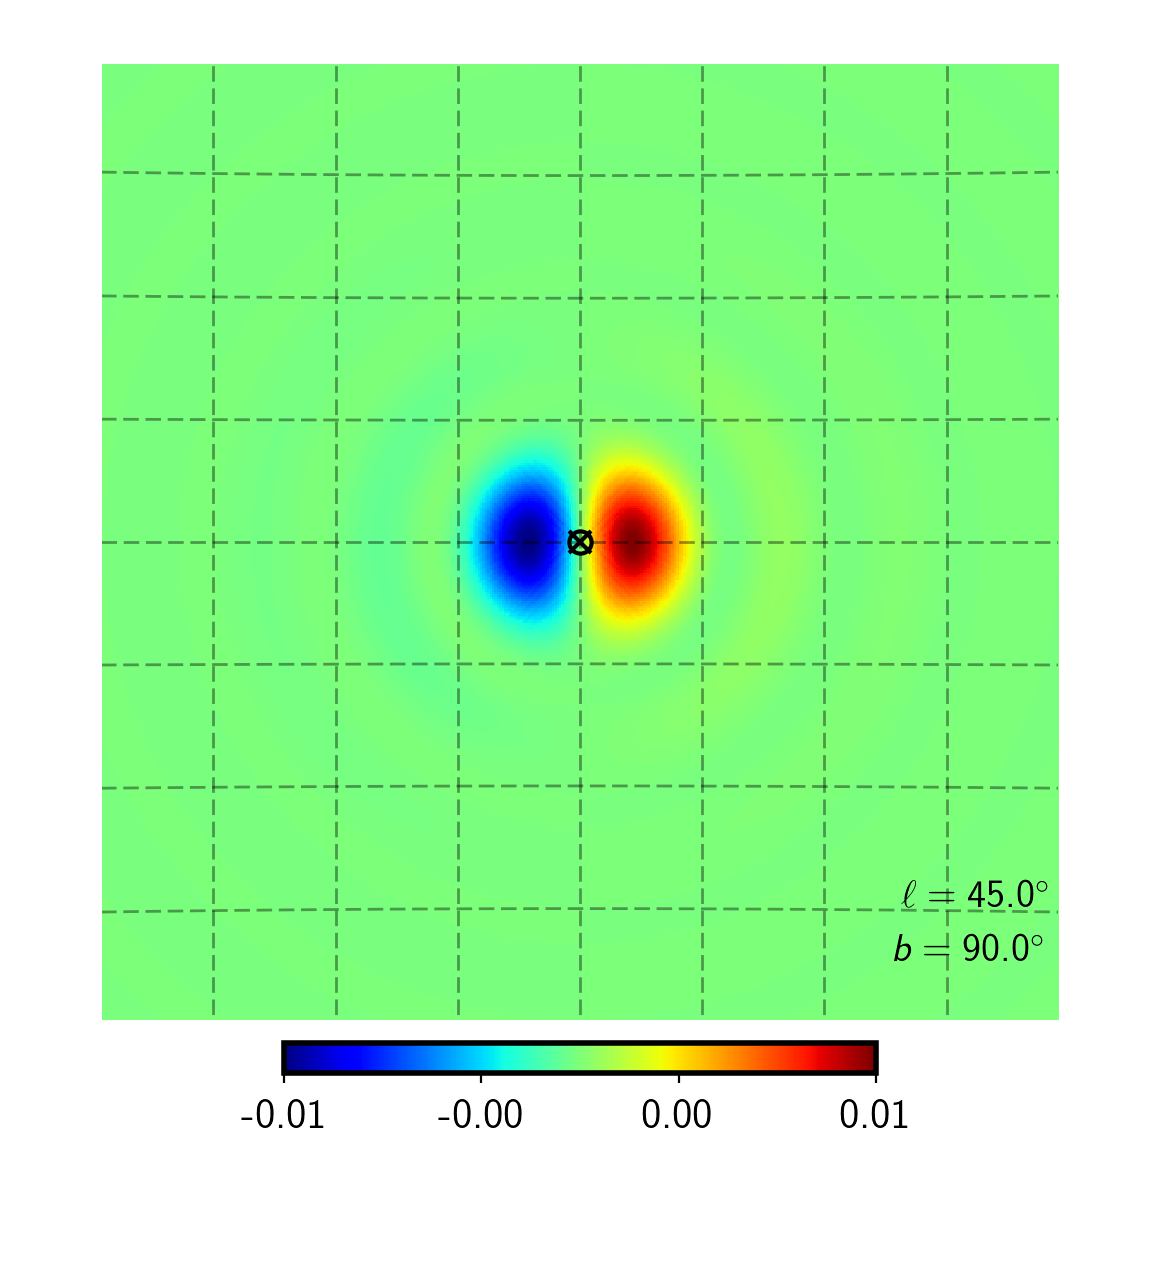

79.0270619358 100.972938064 -10.9729380642 10.9729380642
The interval between parallels is 2 deg 0.00'.
The interval between meridians is 2 deg 0.00'.


In [56]:
tmap=radiate_eb2qu[0]*omega ; vmin=min(tmap) ; vmax=max(tmap)
h.gnomview(tmap,rot=(lon,lat),xsize=xsize,ysize=xsize,reso=reso,title="",min=vmin,max=vmax,notext=True,cbar=None)
h.graticule(dpar=grat,dmer=grat,linestyle="dashed",alpha=0.4)
fig = gcf() ; ax = gca() ; image = ax.get_images()[0]
cmap = fig.colorbar(image,orientation="horizontal",shrink=0.6,pad=0.02,ticks=linspace(vmin,vmax,4),format="%.2f")
cmap.solids.set_edgecolor("face")
text(0.09,-0.120,r"$b=" + str(round(lat,1)) + "^\circ$",fontsize=14)
text(0.092,-0.105,r"$\ell=" + str(round(lon,1)) + "^\circ$",fontsize=14)
h.projplot(0.*np.pi/180,0.*np.pi/180,"x",color="white",markersize=8,markeredgecolor="black",fillstyle="none",markeredgewidth=1.5)
h.projplot((90-lat)*np.pi/180,lon*np.pi/180,"o",color="white",markersize=8,markeredgecolor="black",fillstyle="none",markeredgewidth=1.5)
savefig(figpath + "qu2eb_rker_con_lat" + str(int(round(lat))) + "_lon" + str(int(round(lon))) + ".pdf",dpi=300,bbox_inches="tight")

tmap=radiate_eb2qu[1]*omega ; vmin=min(tmap) ; vmax=max(tmap)
h.gnomview(tmap,rot=(lon,lat),xsize=xsize,ysize=xsize,reso=reso,title="",min=vmin,max=vmax,notext=True,cbar=None)
h.graticule(dpar=grat,dmer=grat,linestyle="dashed",alpha=0.4)
fig = gcf() ; ax = gca() ; image = ax.get_images()[0]
cmap = fig.colorbar(image,orientation="horizontal",shrink=0.6,pad=0.02,ticks=linspace(vmin,vmax,4),format="%.2f")
cmap.solids.set_edgecolor("face")
text(0.09,-0.120,r"$b=" + str(round(lat,1)) + "^\circ$",fontsize=14)
text(0.092,-0.105,r"$\ell=" + str(round(lon,1)) + "^\circ$",fontsize=14)
h.projplot(0.*np.pi/180,0.*np.pi/180,"x",color="white",markersize=8,markeredgecolor="black",fillstyle="none",markeredgewidth=1.5)
h.projplot((90-lat)*np.pi/180,lon*np.pi/180,"o",color="white",markersize=8,markeredgecolor="black",fillstyle="none",markeredgewidth=1.5)
savefig(figpath + "qu2eb_iker_con_lat" + str(int(round(lat))) + "_lon" + str(int(round(lon))) + ".pdf",dpi=300,bbox_inches="tight")

# Radiation - Convolution QU to EB kernels

In [57]:
# tmap=(radiate_qu2eb[0]-radiate_eb2qu[0])*omega ; vmin=min(tmap) ; vmax=max(tmap)
# h.gnomview(tmap,rot=(lon,lat),xsize=xsize,ysize=xsize,reso=reso,title="",min=vmin,max=vmax,notext=True,cbar=None)
# h.graticule(dpar=grat,dmer=grat,linestyle="dashed",alpha=0.4)
# fig = gcf() ; ax = gca() ; image = ax.get_images()[0]
# cmap = fig.colorbar(image,orientation="horizontal",shrink=0.6,pad=0.02,ticks=linspace(vmin,vmax,4),format="%.2e")
# cmap.solids.set_edgecolor("face")
# text(0.09,-0.120,r"$b=" + str(round(lat,1)) + "^\circ$",fontsize=14)
# text(0.092,-0.105,r"$\ell=" + str(round(lon,1)) + "^\circ$",fontsize=14)
# h.projplot(0.*np.pi/180,0.*np.pi/180,"x",color="white",markersize=8,markeredgecolor="black",fillstyle="none",markeredgewidth=1.5)
# h.projplot((90-lat)*np.pi/180,lon*np.pi/180,"o",color="white",markersize=8,markeredgecolor="black",fillstyle="none",markeredgewidth=1.5)
# savefig(figpath + "qu2eb_rker_rad-con_lat" + str(int(round(lat))) + "_lon" + str(int(round(lon))) + ".pdf",dpi=300,bbox_inches="tight")

# tmap=(radiate_qu2eb[1]+radiate_eb2qu[1])*omega ; vmin=min(tmap) ; vmax=max(tmap)
# h.gnomview(tmap,rot=(lon,lat),xsize=xsize,ysize=xsize,reso=reso,title="",min=vmin,max=vmax,notext=True,cbar=None)
# h.graticule(dpar=grat,dmer=grat,linestyle="dashed",alpha=0.4)
# fig = gcf() ; ax = gca() ; image = ax.get_images()[0]
# cmap = fig.colorbar(image,orientation="horizontal",shrink=0.6,pad=0.02,ticks=linspace(vmin,vmax,4),format="%.2e")
# cmap.solids.set_edgecolor("face")
# text(0.09,-0.120,r"$b=" + str(round(lat,1)) + "^\circ$",fontsize=14)
# text(0.092,-0.105,r"$\ell=" + str(round(lon,1)) + "^\circ$",fontsize=14)
# h.projplot(0.*np.pi/180,0.*np.pi/180,"x",color="white",markersize=8,markeredgecolor="black",fillstyle="none",markeredgewidth=1.5)
# h.projplot((90-lat)*np.pi/180,lon*np.pi/180,"o",color="white",markersize=8,markeredgecolor="black",fillstyle="none",markeredgewidth=1.5)
# savefig(figpath + "qu2eb_iker_rad-con_lat" + str(int(round(lat))) + "_lon" + str(int(round(lon))) + ".pdf",dpi=300,bbox_inches="tight")

# D Kernel QU to EQU BQU

<IPython.core.display.Javascript object>


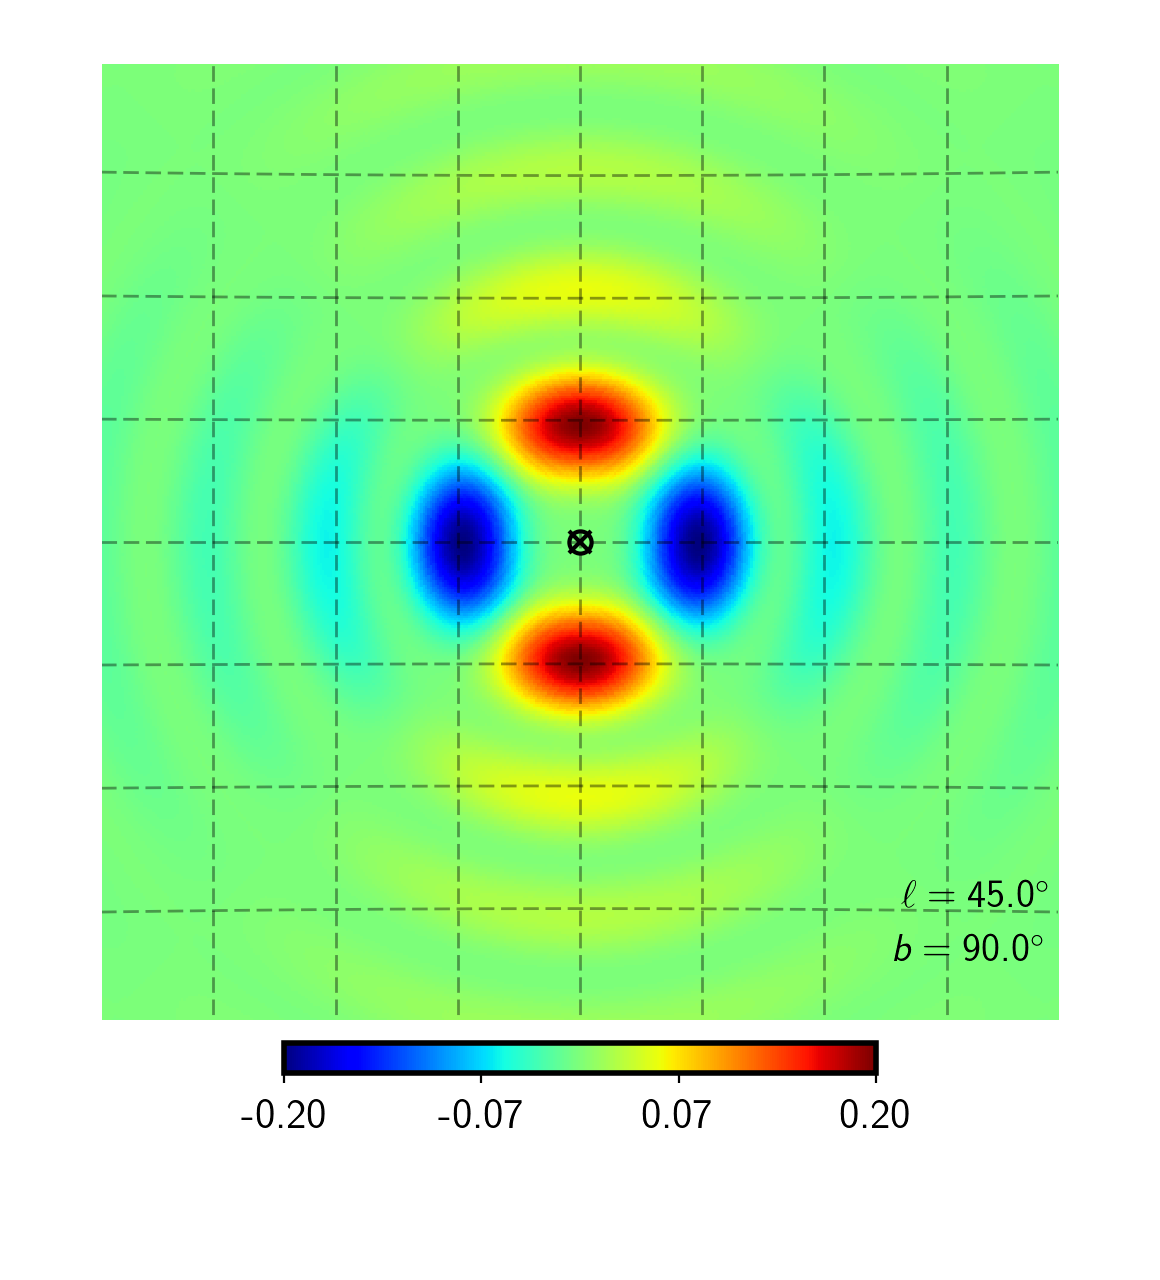

79.0270619358 100.972938064 -10.9729380642 10.9729380642
The interval between parallels is 2 deg 0.00'.
The interval between meridians is 2 deg 0.00'.


<IPython.core.display.Javascript object>


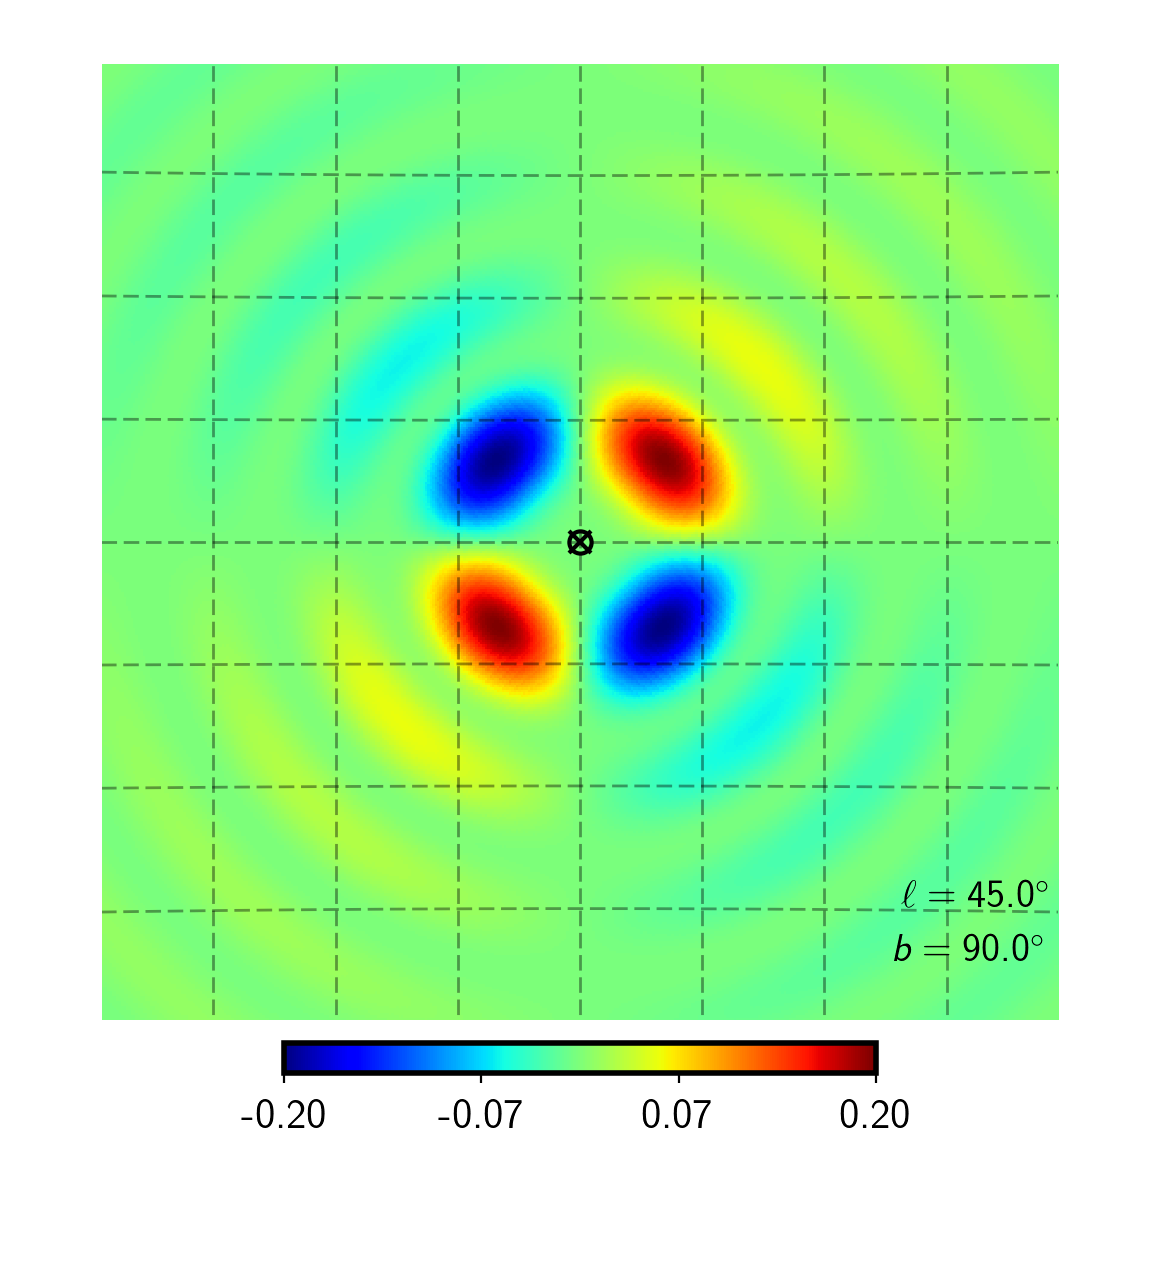

79.0270619358 100.972938064 -10.9729380642 10.9729380642
The interval between parallels is 2 deg 0.00'.
The interval between meridians is 2 deg 0.00'.


In [58]:
tmap=Dker[0]*omega ; vmin=min(tmap) ; vmax=max(tmap)
h.gnomview(tmap,rot=(lon,lat),xsize=xsize,ysize=xsize,reso=reso,title="",min=vmin,max=vmax,notext=True,cbar=None)
h.graticule(dpar=grat,dmer=grat,linestyle="dashed",alpha=0.4)
fig = gcf() ; ax = gca() ; image = ax.get_images()[0]
cmap = fig.colorbar(image,orientation="horizontal",shrink=0.6,pad=0.02,ticks=linspace(vmin,vmax,4),format="%.2f")
cmap.solids.set_edgecolor("face")
text(0.09,-0.120,r"$b=" + str(round(lat,1)) + "^\circ$",fontsize=14)
text(0.092,-0.105,r"$\ell=" + str(round(lon,1)) + "^\circ$",fontsize=14)
h.projplot(0.*np.pi/180,0.*np.pi/180,"x",color="white",markersize=8,markeredgecolor="black",fillstyle="none",markeredgewidth=1.5)
h.projplot((90-lat)*np.pi/180,lon*np.pi/180,"o",color="white",markersize=8,markeredgecolor="black",fillstyle="none",markeredgewidth=1.5)
savefig(figpath + "qu2ebqu_rker_D_lat" + str(int(round(lat))) + "_lon" + str(int(round(lon))) + ".pdf",dpi=300,bbox_inches="tight")

tmap=Dker[1]*omega ; vmin=min(tmap) ; vmax=max(tmap)
h.gnomview(tmap,rot=(lon,lat),xsize=xsize,ysize=xsize,reso=reso,title="",min=vmin,max=vmax,notext=True,cbar=None)
h.graticule(dpar=grat,dmer=grat,linestyle="dashed",alpha=0.4)
fig = gcf() ; ax = gca() ; image = ax.get_images()[0]
cmap = fig.colorbar(image,orientation="horizontal",shrink=0.6,pad=0.02,ticks=linspace(vmin,vmax,4),format="%.2f")
cmap.solids.set_edgecolor("face")
text(0.09,-0.120,r"$b=" + str(round(lat,1)) + "^\circ$",fontsize=14)
text(0.092,-0.105,r"$\ell=" + str(round(lon,1)) + "^\circ$",fontsize=14)
h.projplot(0.*np.pi/180,0.*np.pi/180,"x",color="white",markersize=8,markeredgecolor="black",fillstyle="none",markeredgewidth=1.5)
h.projplot((90-lat)*np.pi/180,lon*np.pi/180,"o",color="white",markersize=8,markeredgecolor="black",fillstyle="none",markeredgewidth=1.5)
savefig(figpath + "qu2ebqu_iker_D_lat" + str(int(round(lat))) + "_lon" + str(int(round(lon))) + ".pdf",dpi=300,bbox_inches="tight")

# I Kernel QU to EQU BQU

<IPython.core.display.Javascript object>


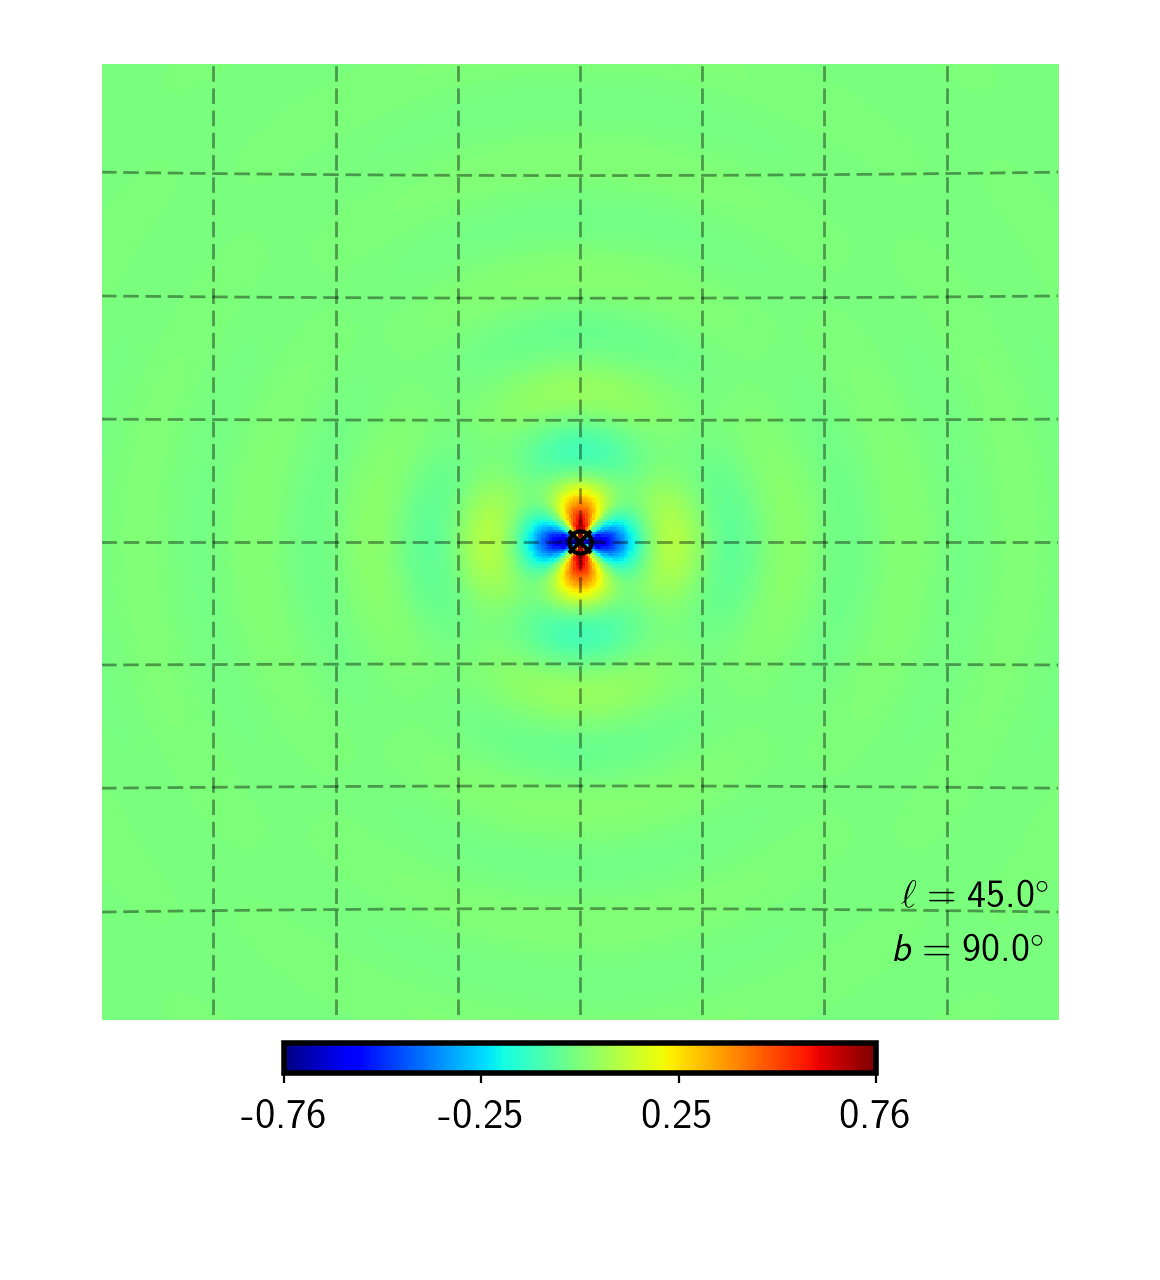

79.0270619358 100.972938064 -10.9729380642 10.9729380642
The interval between parallels is 2 deg 0.00'.
The interval between meridians is 2 deg 0.00'.


<IPython.core.display.Javascript object>


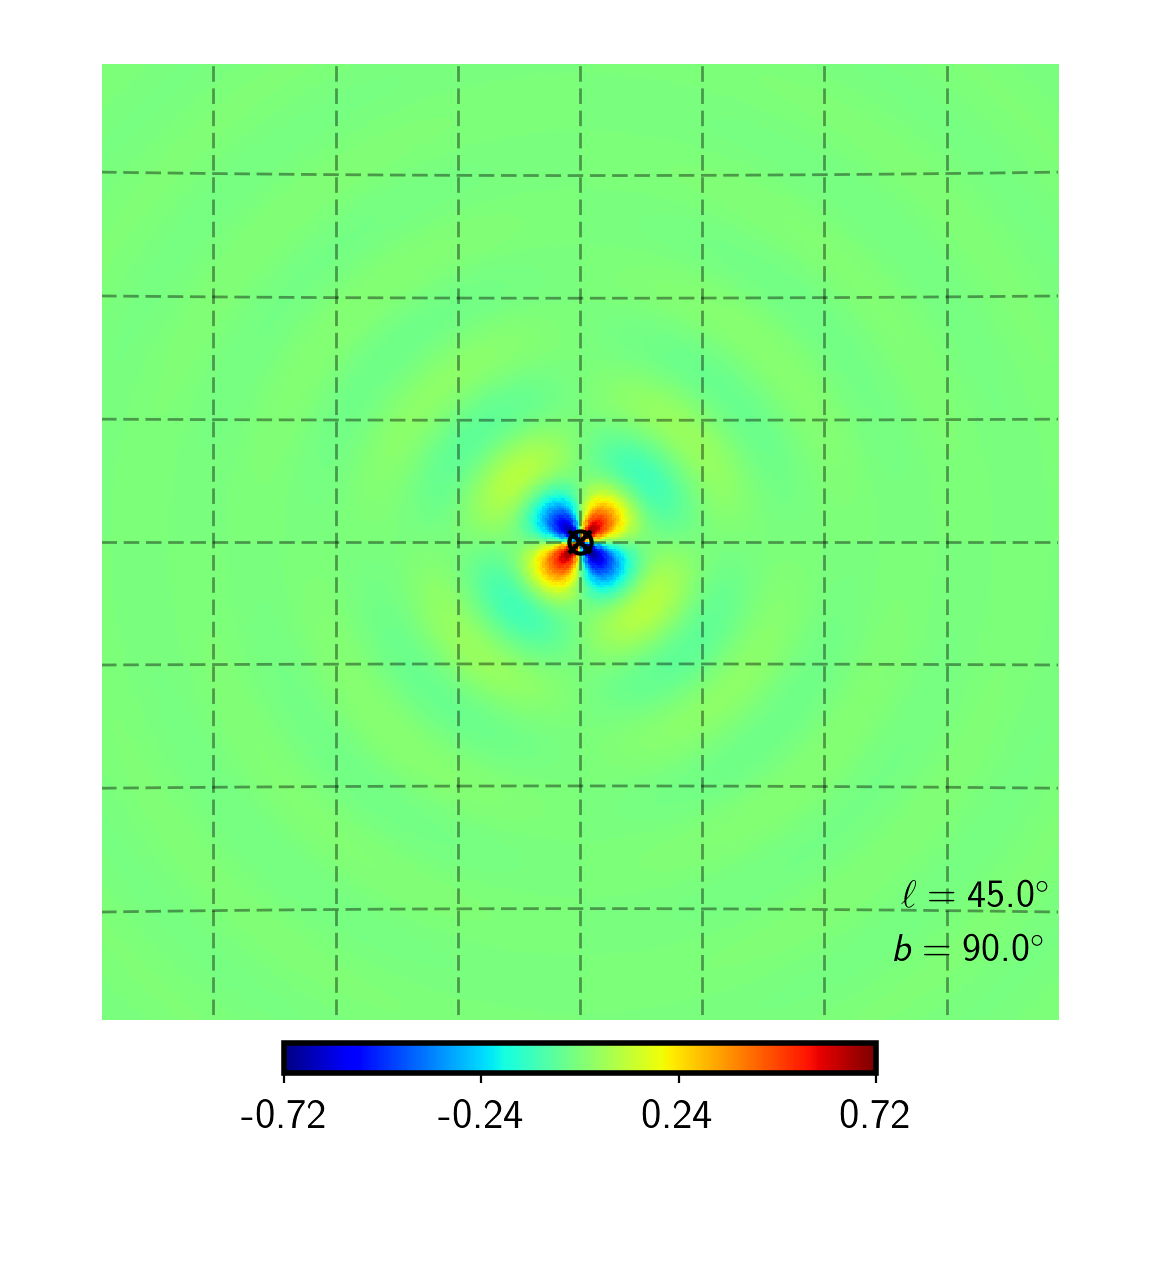

79.0270619358 100.972938064 -10.9729380642 10.9729380642
The interval between parallels is 2 deg 0.00'.
The interval between meridians is 2 deg 0.00'.


In [59]:
tmap=Iker[0]*omega ; vmin=min(tmap) ; vmax=max(tmap)
h.gnomview(tmap,rot=(lon,lat),xsize=xsize,ysize=xsize,reso=reso,title="",min=vmin,max=vmax,notext=True,cbar=None)
h.graticule(dpar=grat,dmer=grat,linestyle="dashed",alpha=0.4)
fig = gcf() ; ax = gca() ; image = ax.get_images()[0]
cmap = fig.colorbar(image,orientation="horizontal",shrink=0.6,pad=0.02,ticks=linspace(vmin,vmax,4),format="%.2f")
cmap.solids.set_edgecolor("face")
text(0.09,-0.120,r"$b=" + str(round(lat,1)) + "^\circ$",fontsize=14)
text(0.092,-0.105,r"$\ell=" + str(round(lon,1)) + "^\circ$",fontsize=14)
h.projplot(0.*np.pi/180,0.*np.pi/180,"x",color="white",markersize=8,markeredgecolor="black",fillstyle="none",markeredgewidth=1.5)
h.projplot((90-lat)*np.pi/180,lon*np.pi/180,"o",color="white",markersize=8,markeredgecolor="black",fillstyle="none",markeredgewidth=1.5)
savefig(figpath + "qu2ebqu_rker_I_lat" + str(int(round(lat))) + "_lon" + str(int(round(lon))) + ".pdf",dpi=300,bbox_inches="tight")

tmap=Iker[1]*omega ; vmin=min(tmap) ; vmax=max(tmap)
h.gnomview(tmap,rot=(lon,lat),xsize=xsize,ysize=xsize,reso=reso,title="",min=vmin,max=vmax,notext=True,cbar=None)
h.graticule(dpar=grat,dmer=grat,linestyle="dashed",alpha=0.4)
fig = gcf() ; ax = gca() ; image = ax.get_images()[0]
cmap = fig.colorbar(image,orientation="horizontal",shrink=0.6,pad=0.02,ticks=linspace(vmin,vmax,4),format="%.2f")
cmap.solids.set_edgecolor("face")
text(0.09,-0.120,r"$b=" + str(round(lat,1)) + "^\circ$",fontsize=14)
text(0.092,-0.105,r"$\ell=" + str(round(lon,1)) + "^\circ$",fontsize=14)
h.projplot(0.*np.pi/180,0.*np.pi/180,"x",color="white",markersize=8,markeredgecolor="black",fillstyle="none",markeredgewidth=1.5)
h.projplot((90-lat)*np.pi/180,lon*np.pi/180,"o",color="white",markersize=8,markeredgecolor="black",fillstyle="none",markeredgewidth=1.5)
savefig(figpath + "qu2ebqu_iker_I_lat" + str(int(round(lat))) + "_lon" + str(int(round(lon))) + ".pdf",dpi=300,bbox_inches="tight")